In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

Part 1:
Reading in the data

In [76]:


folder_path = '../TECH2-GROUP-TERM-PAPER/data'  # replace with your folder path

# List all CSV files in the folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Exclude the CPI file (assuming the file name contains 'cpi', case-insensitive)
files_to_read = [f for f in all_files if 'CPI' not in f.upper()]

# Read all remaining files into a dictionary of DataFrames
dfs = []
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    dfa = pd.read_csv(file_path, sep = ';', parse_dates = ['date'] )
    #data_frames[file] = df
    dfs.append(dfa)
df = pd.concat(dfs, ignore_index=True)
df

# Now data_frames contains all your CSVs except the CPI file

,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,70000238,201309,2013-09-05,0.8,0.0,3.0,74.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70000239,201309,2013-09-03,0.4,1.0,4.0,67.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70000312,201309,2013-09-04,0.4,0.0,4.0,50.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70000327,201309,2013-09-03,1.2,0.0,3.0,58.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70000337,201309,2013-09-04,5.1,1.0,2.0,40.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75008816,202209,2022-09-01,0.6,1.0,4.0,33.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176097,75008817,202209,2022-09-12,1.2,0.0,3.0,71.0,0.0,0.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176098,75008829,202209,2022-09-02,0.9,0.0,3.0,35.0,0.0,0.0,1.0,...,10.0,1.0,10.0,0.0,2.0,0.0,3.0,1.0,2.0,1.0
176099,75008832,202209,2022-09-10,0.5,1.0,4.0,31.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0


In [77]:
print(f'number of uniqe induviduals:', df['userid'].nunique())
print(f'number of observations:', len(df))
print(f'number of survey waves:',len(df['wid'].unique()))
print(f'The first date:', df['date'].min().date())
print(f'The last date:', df['date'].max().date()) 

number of uniqe induviduals: 23369
number of observations: 176101
number of survey waves: 139
The first date: 2013-06-01
The last date: 2024-12-31


In [78]:
college = (df['educ']>2)
df['college']= college.astype(int)

df['college']


0         1
1         1
2         1
3         1
4         0
         ..
176096    1
176097    1
176098    1
176099    1
176100    0
Name: college, Length: 176101, dtype: int64

In [79]:
columnsnum = ['num_lit_q1_correct' , 
 'num_lit_q2_correct',
 'num_lit_q3_correct',
 'num_lit_q5_correct',
 'num_lit_q6_correct',
 'num_lit_q8_correct',
 'num_lit_q9_correct']
 #add column for average numeracy
df['numeracyavg'] = df[columnsnum].mean(axis = 1)
numeracy = (df['numeracyavg']>=0.5)

#divide between high and low numeracy

df['Numeracy'] = numeracy.astype(int)

Part 2: Data pre-processing

Part 3: Average expectations by group 

In this part we use the data to investigate how average expecations differ by gender, level of education, and numeracy. 

In [80]:
# lists
variables = ['inflation', 'house_price_change', 'prob_stocks_up']
genders = ["Male", 'Female']
genderint = [0.0, 1.0]
figures = ['Inflation', 'House price change', 'Prob. Stocks up']
education = ['Not College Educated', 'College Educated']
numeracy_rate = ['High Numeracy', 'Low Numeracy']
colors = ['red', 'blue']
calc_groups = ['df_gender', 'df_college', 'df_numeracy']
falseind = ['Male', 'Not college educated', 'Low numeracy rate']
trueind = ['Female', 'College educated', 'High numeracy rate']

In [81]:
# 1. average for each expectations variable


# Create a function to calculate and print the average variables 

def df_calculation(variable, falseind, trueind, calc_group):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(calc_group[variable].mean(),1)
    variable_average = variable_average.rename({0.0: f'{falseind}', 1.0: f'{trueind}'})
    variabledc = variable_average.to_dict()
    for key, value in variabledc.items(): 
        print(f'The average answer for {variable_neat} from the {key} group is {value}.')

df_gender = df.groupby(['female'])
for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'male', trueind = 'female', calc_group = df_gender)
    print(' ')

df_college = df.groupby(['college'])

for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'non College educated',trueind = 'college educated' , calc_group = df_college)
    print('')

df_numeracy = df.groupby(['Numeracy'])

for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'low numeracy rate', trueind = 'high numeracy rate', calc_group = df_numeracy)
    print('')

The average answer for INFLATION from the male group is 4.9.
The average answer for INFLATION from the female group is 7.4.
 
The average answer for HOUSE PRICE CHANGE from the male group is 4.6.
The average answer for HOUSE PRICE CHANGE from the female group is 6.5.
 
The average answer for PROB STOCKS UP from the male group is 45.9.
The average answer for PROB STOCKS UP from the female group is 38.0.
 
The average answer for INFLATION from the non College educated group is 10.6.
The average answer for INFLATION from the college educated group is 5.5.

The average answer for HOUSE PRICE CHANGE from the non College educated group is 8.0.
The average answer for HOUSE PRICE CHANGE from the college educated group is 5.1.

The average answer for PROB STOCKS UP from the non College educated group is 35.5.
The average answer for PROB STOCKS UP from the college educated group is 43.0.

The average answer for INFLATION from the low numeracy rate group is 5.8.
The average answer for INFLATION f

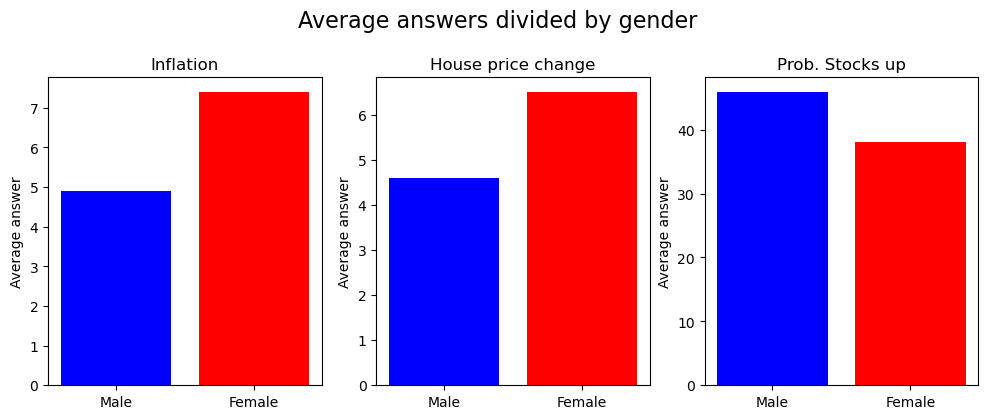

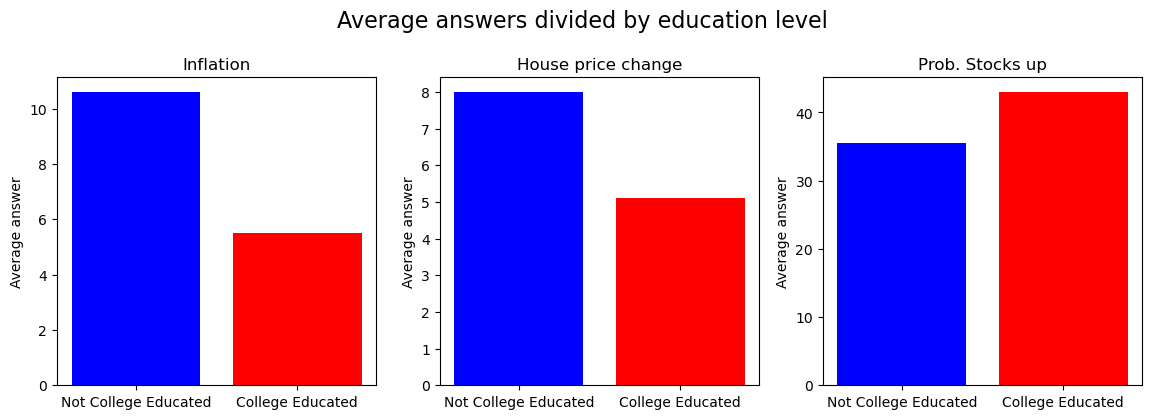

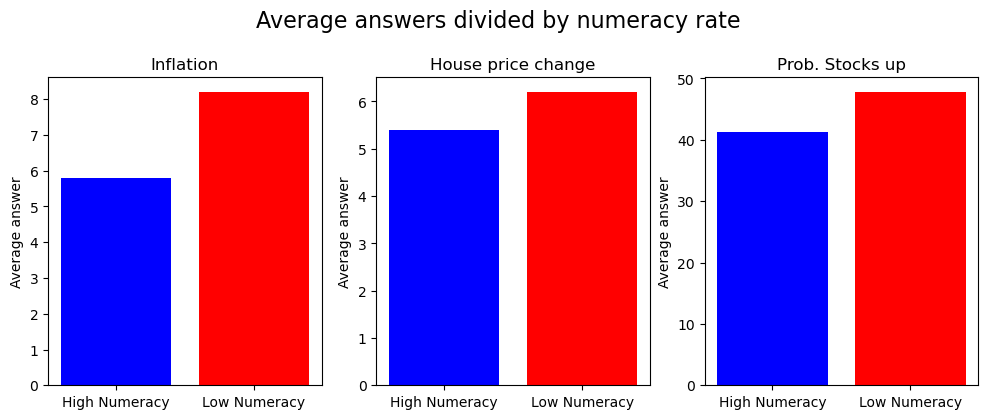

In [82]:
#create function for each division to get the values
def df_gender_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_gender[variable].mean(),1)
    variable_average = variable_average.rename({0.0: 'Male', 1.0: 'Female'})
    variabledc = variable_average.to_dict()

    return variabledc.values()

def df_college_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_college[variable].mean(),1)
    variable_average = variable_average.rename({0.0: 'Not College Educated', 1.0:'College educated'})
    variabledc = variable_average.to_dict()
    return variabledc.values()

def df_numeracy_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_numeracy[variable].mean(), 1)
    variable_average = variable_average.rename({0.0: 'Low Numeracy Rate', 1.0:'High Numeracy rate'})
    variabledc = variable_average.to_dict()
    return variabledc.values()
    
#function to plot figure for each division 
def plot_figure(x,y,division, dict_function, categories):
    fig, axes = plt.subplots(1, 3,  figsize=(x, y))
    fig.suptitle(f'Average answers divided by {division}', fontsize = 16, y = 1.05)

    #loop to create three figures for each variable
    c = 0
    for i in range(len(variables)):
        avg = dict_function(variable=variables[i])
        axes[c].bar(categories, avg, color = ['blue', 'red'])
        axes[c].set_title(figures[c])
        axes[c].set_ylabel('Average answer')
        
        c +=1
#use functions
plot_figure(x=12,y=4,division='gender', dict_function=df_gender_dictionary, categories = genders)
plot_figure(x=14,y=4, division = 'education level', dict_function = df_college_dictionary, categories = education)
plot_figure(x=12, y=4, division = 'numeracy rate', dict_function = df_numeracy_dictionary, categories = numeracy_rate)

Part 4: Expectations dynamics by group

In this part we use the data to investigate how average expectations evolved over time in the period of 2015-2024, divided by gender, education level and numeracy. 

In [83]:
# 2015-2024
#set date as index
df4 = df.set_index('date')
#values are not in order, so put them in order of date
df4 = df4.sort_index()
#locate correct years
df4 = df4.loc['2015-01-03': '2024-12-31']
#resample data to monthly
df4monthly = df4.resample('ME')

In [84]:
#1  collapse data to monthly averages and storing them in dictionaries
# Create dictionary for all values

# gender

df_gender4 = df4.groupby(['female'])
df_gender_month_avg = df_gender4.resample('ME', include_groups=False).mean()
gender4_dictionary = {}
for i in range(len(variables)):
    mon_avgg = df_gender_month_avg[variables[i]]
    gender4_dictionary[i]=mon_avgg
    
# educ
df_college4 = df4.groupby(['college'])
df_college_avg4 = df_college4.resample('ME', include_groups=False).mean()
educ4_dictionary = {}
for i in range(len(variables)):
    mon_avgc = df_college_avg4[variables[i]]
    educ4_dictionary[i]=mon_avgc


#numeracy rates
df_numeracy4 = df4.groupby(['Numeracy'])
df_numeracy4_avg = df_numeracy4.resample('ME', include_groups=False).mean()
num4_dictionary = {}
for i in range(len(variables)):
    mon_avgn = df_numeracy4_avg[variables[i]]
    num4_dictionary[i]=mon_avgn

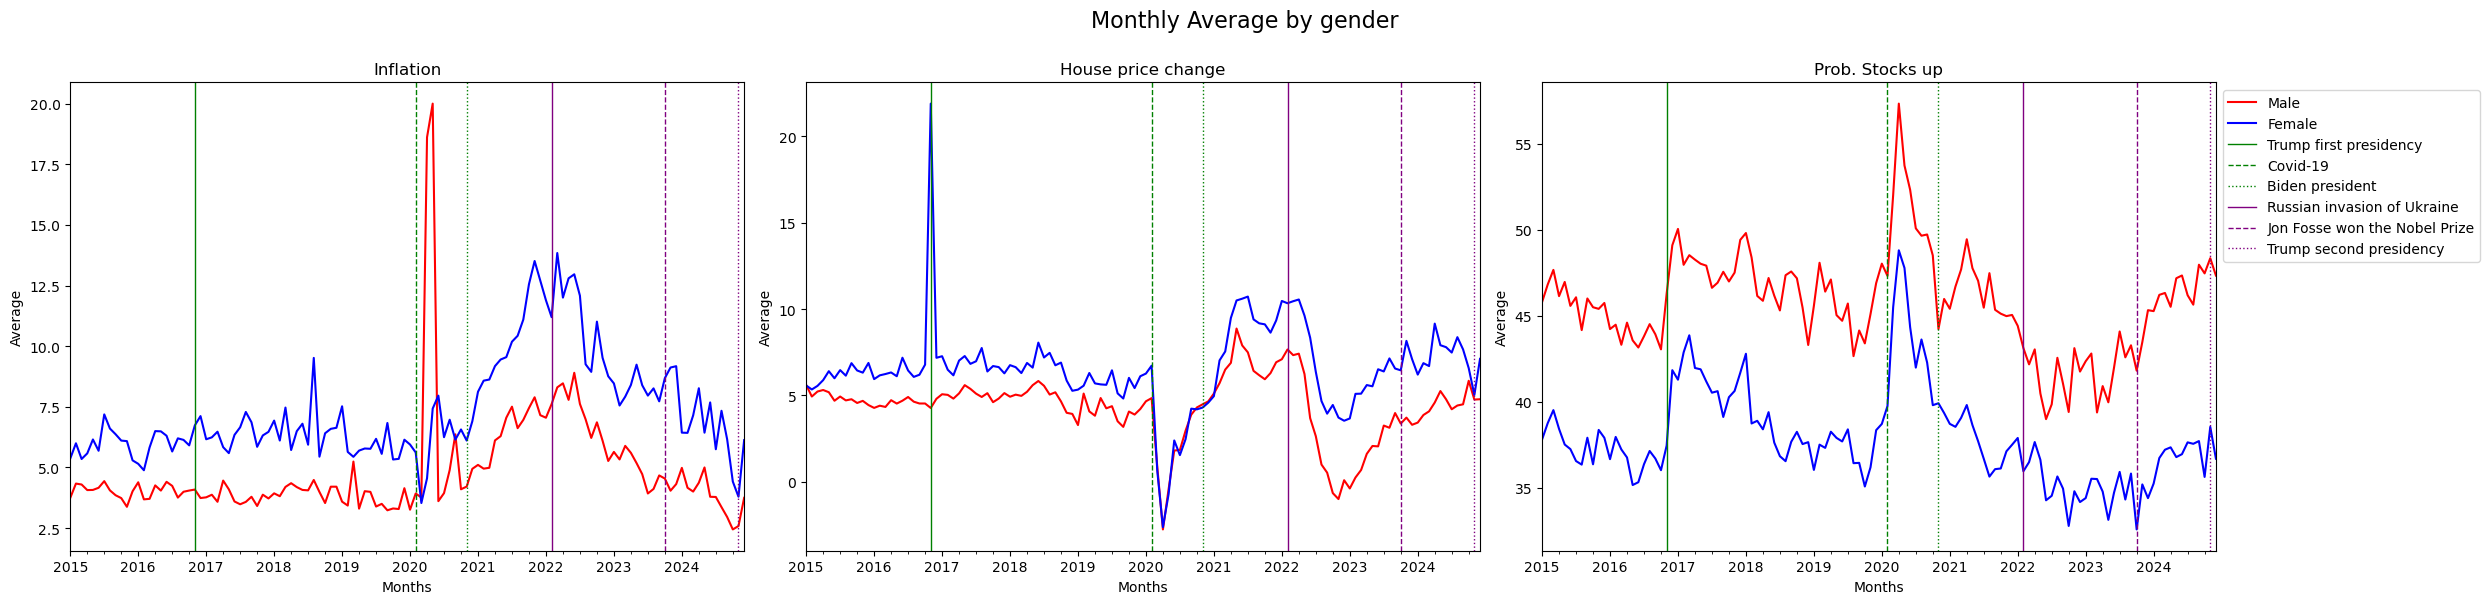

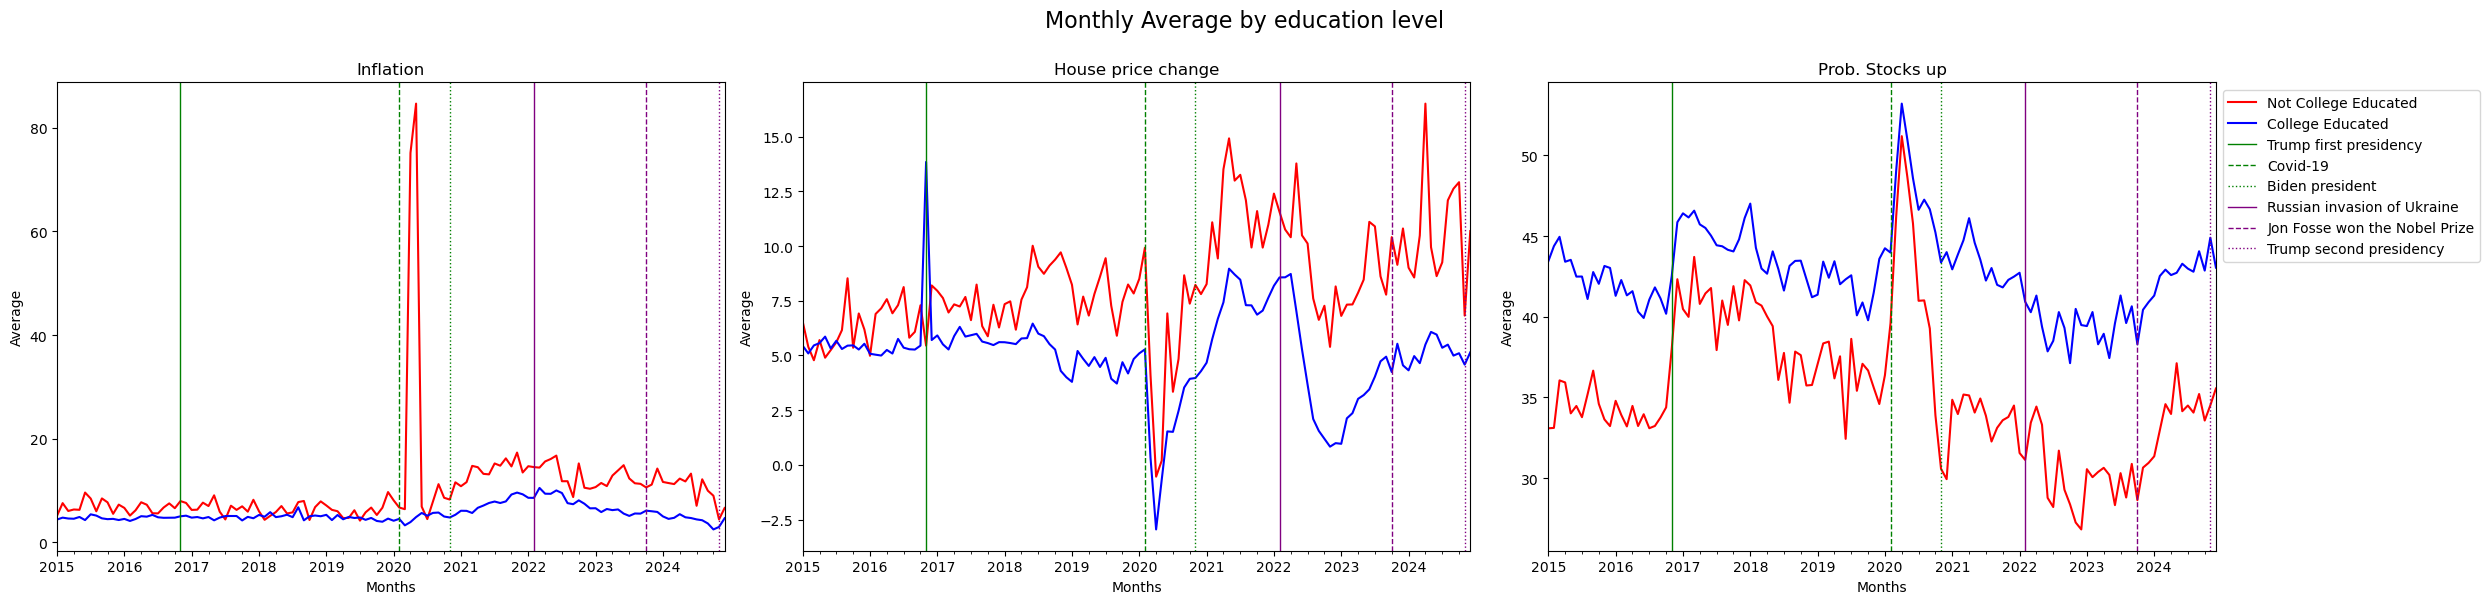

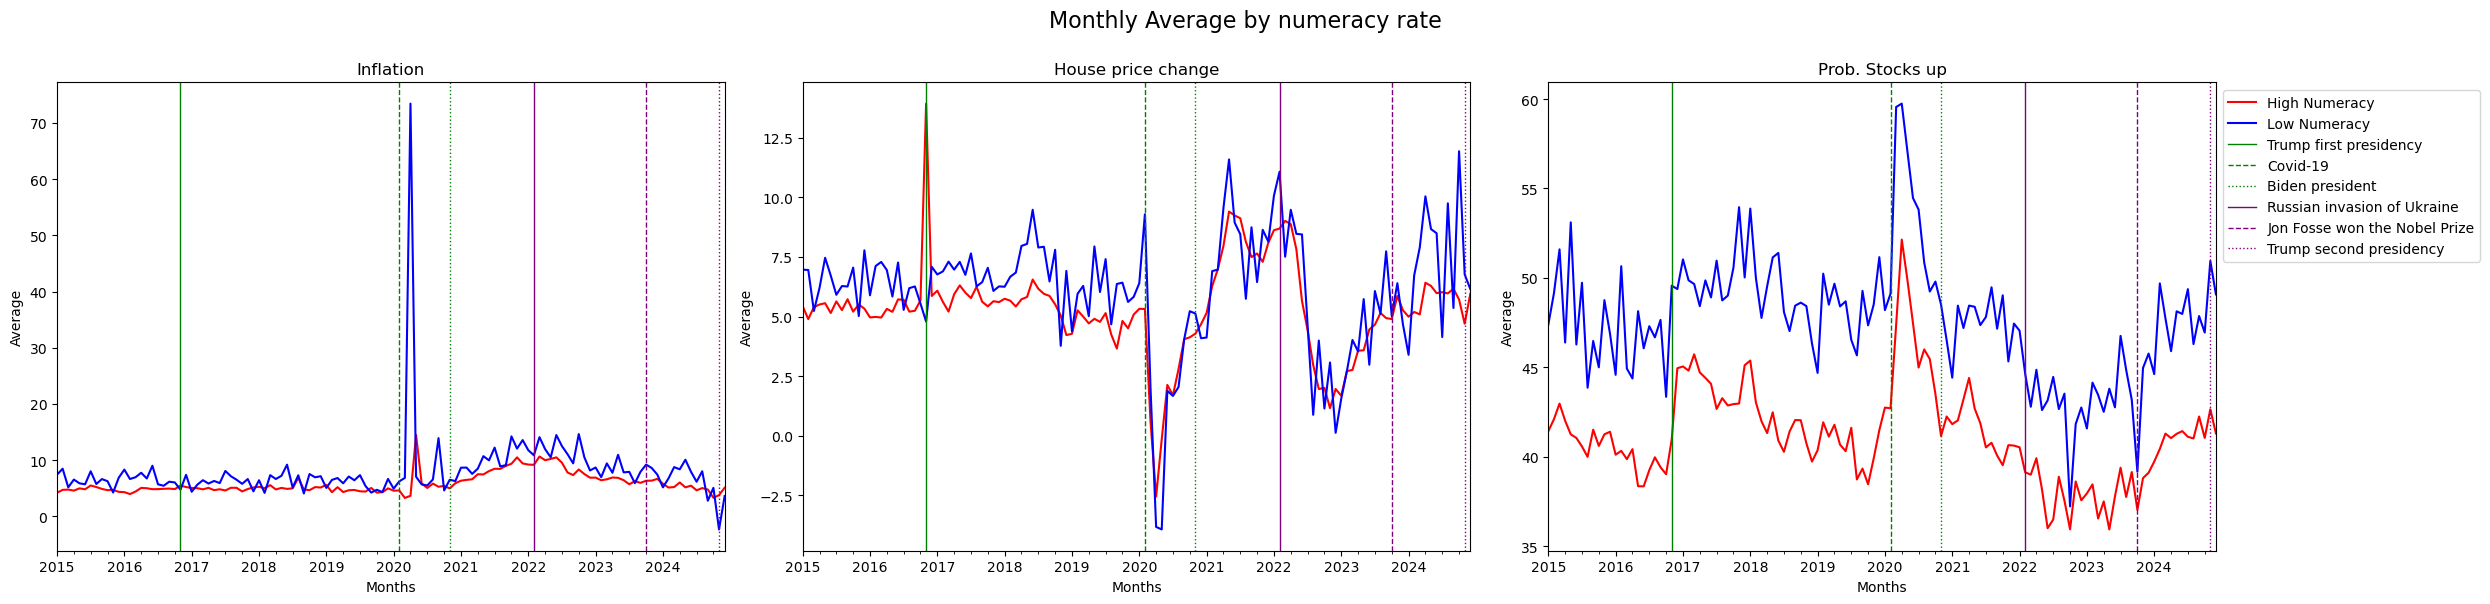

In [85]:
#2 creating figures
# gender
#all dates for vertical lines
trump1 = '2016-11-08'
covid = '2020-02-01'
biden = '2020-11-03'
russia = '2022-02-24'
nobel = '2023-10-03'
trump2 = '2024-11-05'
# create a function to plot each vertical line
def vertical_lines(ax):
    ax.axvline(x=trump1, color='green', linestyle='-', linewidth=1, label = 'Trump first presidency')
    ax.axvline(x= covid, color = 'green', linestyle = '--', linewidth = 1, label = 'Covid-19')
    ax.axvline(x= biden, color = 'green', linestyle = ':', linewidth = 1, label = 'Biden president')
    ax.axvline(x= russia, color = 'purple', linestyle = '-', linewidth = 1, label = 'Russian invasion of Ukraine')
    ax.axvline(x= nobel, color = 'purple', linestyle = '--', linewidth = 1, label = 'Jon Fosse won the Nobel Prize')
    ax.axvline(x= trump2, color = 'purple', linestyle = ':', linewidth = 1, label = 'Trump second presidency')

# create a function to plot a figure for each group
def plot_monthly_avg(division, data_dictionary, indicator):
    fig, axes = plt.subplots(1, 3, figsize=(25, 6), sharex=True)
    fig.suptitle(f'Monthly Average by {division}', fontsize=16, y=1)
    #loop to create a panel for each variable
    for i in range(len(variables)):
        mon_avg = data_dictionary[i]
        y=0
        for a in genderint:
            data = mon_avg.loc[a]
            data.plot(ax = axes[i], label = indicator[y], color = colors[y])
            y+=1
            
        axes[i].set_title(figures[i])
        axes[i].set_xlabel('Months')
        axes[i].set_ylabel('Average')
        #plot vertical lines
        vertical_lines(axes[i])
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.8))

    plt.tight_layout()
    plt.show()
#plot figures
plot_monthly_avg(division = "gender", data_dictionary = gender4_dictionary, indicator = genders)
plot_monthly_avg(division = 'education level', data_dictionary = educ4_dictionary, indicator = education)
plot_monthly_avg(division = 'numeracy rate', data_dictionary = num4_dictionary, indicator = numeracy_rate)

Part 5: Correlations with past & future realizations

/var/folders/80/91ms8tv943z6jnxqt35fh0tm0000gn/T/ipykernel_29434/2123575907.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key="date", freq="M"), "female"])["inflation"]


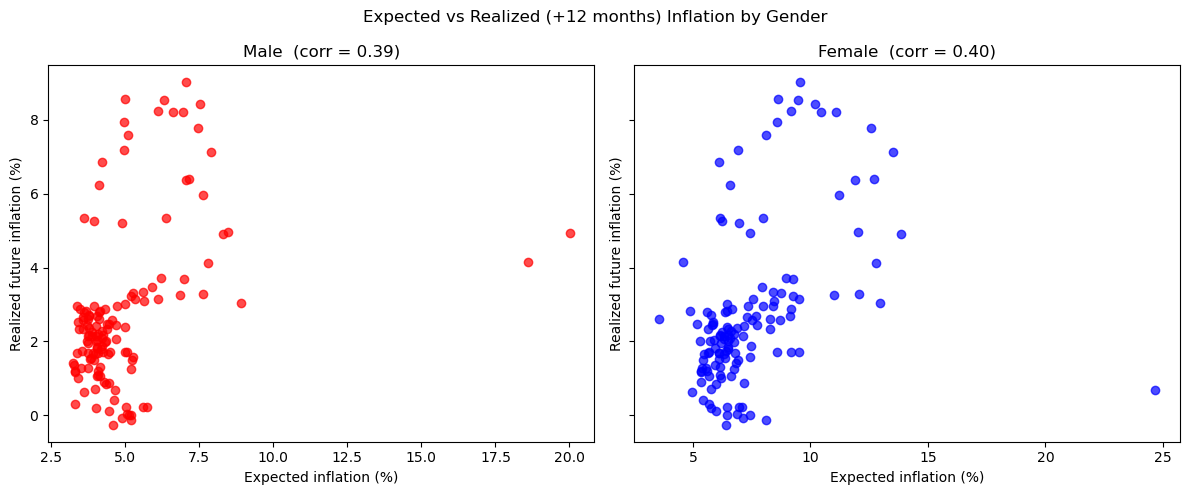

In [ ]:
#Part 5A – Future (+12 months) Inflation

# Load CPI data
cpi = pd.read_csv("data/CPI.csv", parse_dates=["DATE"])
cpi.rename(columns={"DATE": "date", "CPI": "cpi"}, inplace=True)
cpi.sort_values("date", inplace=True)

# Compute forward 12-month inflation
cpi["cpi_future12"] = cpi["cpi"].shift(-12)
cpi["inflation_future12"] = (cpi["cpi_future12"] - cpi["cpi"]) / cpi["cpi"] * 100

# Compute monthly expected inflation by gender FIRST
df_gender_month_avg = (
    df.groupby([pd.Grouper(key="date", freq="M"), "female"])["inflation"]
    .mean()
    .reset_index()
    .rename(columns={"inflation": "exp_inflation"})
)

# Align dates by month BEFORE merging
df_gender_month_avg["month"] = df_gender_month_avg["date"].dt.to_period("M")
cpi["month"] = cpi["date"].dt.to_period("M")

# Merge on month
merged_future = pd.merge(
    df_gender_month_avg,
    cpi[["month", "inflation_future12"]],
    on="month",
    how="inner"
)

# Convert month back to datetime for plotting
merged_future["date"] = merged_future["month"].dt.to_timestamp()

# ---------- Plot -----------

genders = {0.0: "Male", 1.0: "Female"}
colors = ["red", "blue"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, (val, label), color in zip(axes, genders.items(), colors):

    df_g = merged_future[merged_future["female"] == val]
    corr = df_g["exp_inflation"].corr(df_g["inflation_future12"])

    ax.scatter(df_g["exp_inflation"], df_g["inflation_future12"], alpha=0.7, color=color)
    ax.set_title(f"{label}  (corr = {corr:.2f})")
    ax.set_xlabel("Expected inflation (%)")
    ax.set_ylabel("Realized future inflation (%)")

plt.suptitle("Expected vs Realized (+12 months) Inflation by Gender")
plt.tight_layout()
plt.show()




The correlation coefficients indicate only a weak link between expected inflation and the inflation that materializes twelve months later. This suggests that people’s beliefs about inflation are formed using simple heuristics rather than accurate forecasts. Gender differences are modest: women tend to expect slightly higher inflation, and their expectations are somewhat less correlated with future inflation, but overall both groups show similarly limited predictive accuracy.


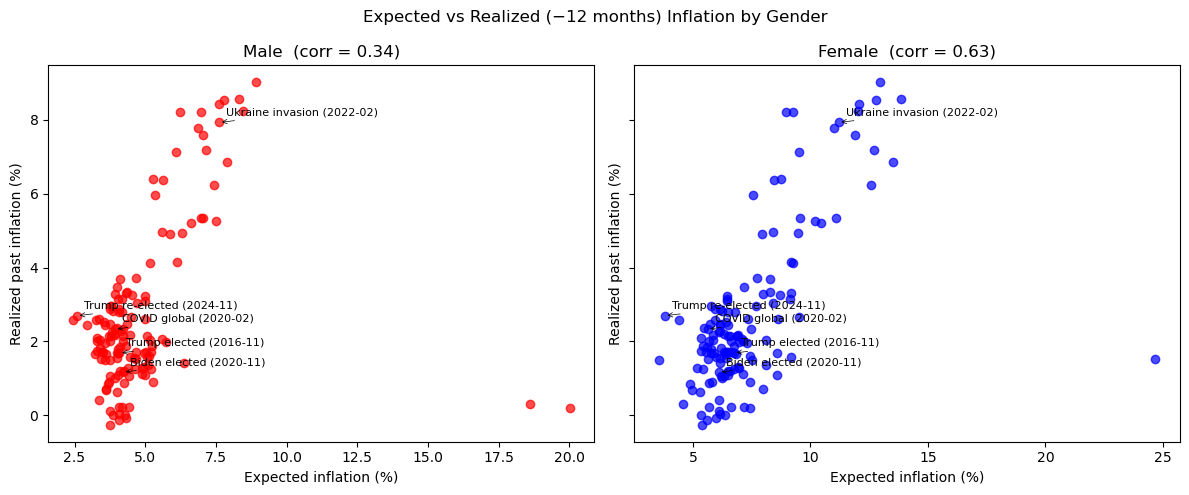

In [ ]:
# Part 5B – Past (−12 months) Inflation

# CPI already loaded in Part 5A
# Compute backward 12-month inflation
cpi["cpi_past12"] = cpi["cpi"].shift(12)
cpi["inflation_past12"] = (cpi["cpi"] - cpi["cpi_past12"]) / cpi["cpi_past12"] * 100

# Align to monthly period for merging
df_gender_month_avg["month"] = df_gender_month_avg["date"].dt.to_period("M")
cpi["month"] = cpi["date"].dt.to_period("M")

# Merge on monthly period
merged_past = pd.merge(
    df_gender_month_avg,
    cpi[["month", "inflation_past12"]],
    on="month",
    how="inner"
)

# Convert period back to datetime
merged_past["date"] = merged_past["month"].dt.to_timestamp()

# ---- Scatter plot ----
genders = {0.0: "Male", 1.0: "Female"}
colors = ["red", "blue"]
events = {
    "Trump elected (2016-11)": "2016-11-01",
    "COVID global (2020-02)": "2020-02-01",
    "Biden elected (2020-11)": "2020-11-01",
    "Ukraine invasion (2022-02)": "2022-02-01",
    "Trump re-elected (2024-11)": "2024-11-01",
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
for ax, (val, label), color in zip(axes, genders.items(), colors):
    df_g = merged_past[merged_past["female"] == val]
    corr = df_g["exp_inflation"].corr(df_g["inflation_past12"])
    ax.scatter(df_g["exp_inflation"], df_g["inflation_past12"], alpha=0.7, color=color)
    ax.set_title(f"{label}  (corr = {corr:.2f})")
    ax.set_xlabel("Expected inflation (%)")
    ax.set_ylabel("Realized past inflation (%)")

    for event, date_str in events.items():
        date = pd.Timestamp(date_str)
        if date in df_g["date"].values:
            x = df_g.loc[df_g["date"] == date, "exp_inflation"].values[0]
            y = df_g.loc[df_g["date"] == date, "inflation_past12"].values[0]
            ax.annotate(event, (x, y), textcoords="offset points", xytext=(5, 5),
                        fontsize=8, color="black",
                        arrowprops=dict(arrowstyle="->", lw=0.5))

plt.suptitle("Expected vs Realized (−12 months) Inflation by Gender")
plt.tight_layout()
plt.show()



Expected inflation shows a moderate relationship with the inflation that occurred over the past twelve months, indicating that people partly base their beliefs on recent price trends. However, this connection is not very strong, so expectations remain imperfect. Gender differences are minor: women generally expect slightly higher inflation, but overall both men and women form expectations that are only loosely linked to past inflation.
